## MVA 2021-22  

To download this notebook or its pdf version:

http://geometrica.saclay.inria.fr/team/Fred.Chazal/MVA2021.html

Documentation for the latest version of Gudhi: 

http://gudhi.gforge.inria.fr/python/latest/

The goal of this first TP is to get you familiar with the basic data structures in GUDHI to  build and manipulate simplicial complexes and filtrations. 

# Simplicial complexes and simplex trees

In Gudhi, (filtered) simplicial complexes are encoded through a data structure called simplex tree. Here is a very simple example illustrating the use of simplex tree to represent simplicial complexes. See the Gudhi documentation for a complete list of functionalities. Try the following code and a few other functionalities from the documentation to get used to the Simplex Tree data structure.

In [1]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
st = gd.SimplexTree() # Create an empty simplicial complex

# Simplicies can be inserted 1 by 1
# Vertices are indexed by integers
if st.insert([0,1]):
    print("First simplex inserted!")
st.insert([1,2])
st.insert([2,3])
st.insert([3,0])
st.insert([0,2])
st.insert([3,1])

First simplex inserted!


True

In [3]:
L = st.get_filtration() # Get a list with all simplices
# Notice that inserting an edge automatically inserts its vertices, if they were not already in the complex
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)


In [4]:
# Insert the 2-skeleton, giving some filtration values to the faces
st.insert([0,1,2],filtration=0.1)
st.insert([1,2,3],filtration=0.2)
st.insert([0,2,3],filtration=0.3)
st.insert([0,1,3],filtration=0.4)

# If you add a new simplex with a given filtration value, all its faces that 
# were not in the complex are inserted with the same filtration value
st.insert([2,3,4],filtration=0.7)
L = st.get_filtration()
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 0.7)


The filtration value of a simplex can be changed in the following way

In [5]:
st.assign_filtration((2,3,4),1.0)

L = st.get_filtration()
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 1.0)


** Warning! ** Take care that after changing the filtration value of a simplex, the result could no longer be a filtration, as illustrated below :

In [6]:
print("Giving the edge [3,4] the value 1.5:")
st.assign_filtration((3,4),1.5)
L = st.get_filtration()
for simplex in L:
    print(simplex)
print("The result is no longer a filtration : [3,4] has a higher value than its coface [2,3,4]")
print("To fix the problem, use make_filtration_non_decreasing()")
st.make_filtration_non_decreasing()
L = st.get_filtration()
for simplex in L:
    print(simplex)

Giving the edge [3,4] the value 1.5:
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([4], 0.7)
([2, 4], 0.7)
([2, 3, 4], 1.0)
([3, 4], 1.5)
The result is no longer a filtration : [3,4] has a higher value than its coface [2,3,4]
To fix the problem, use make_filtration_non_decreasing()
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([0, 1, 2], 0.1)
([1, 2, 3], 0.2)
([0, 2, 3], 0.3)
([0, 1, 3], 0.4)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 1.5)
([2, 3, 4], 1.5)


In [7]:
# Many operations can be done on simplicial complexes, see also the Gudhi documentation and examples
print("dimension=",st.dimension())
print("filtration value of [1,2]=",st.filtration([1,2]))
print("filtration value of [4,2]=",st.filtration([4,2]))
print("num_simplices=", st.num_simplices())
print("num_vertices=", st.num_vertices())

# get_skeleton get the set of simplices of dimension at most 2
print("skeleton[2]=", st.get_skeleton(2)) 
print("skeleton[1]=", st.get_skeleton(1))
print("skeleton[0]=", st.get_skeleton(0))
L = st.get_skeleton(1)
for simplex in L:
    print(simplex)

dimension= 2
filtration value of [1,2]= 0.0
filtration value of [4,2]= 0.7
num_simplices= 18
num_vertices= 5
skeleton[2]= <generator object at 0x000001F4B816DAF0>
skeleton[1]= <generator object at 0x000001F4B816DAF0>
skeleton[0]= <generator object at 0x000001F4B816DAF0>
([0, 1], 0.0)
([0, 2], 0.0)
([0, 3], 0.0)
([0], 0.0)
([1, 2], 0.0)
([1, 3], 0.0)
([1], 0.0)
([2, 3], 0.0)
([2, 4], 0.7)
([2], 0.0)
([3, 4], 1.5)
([3], 0.0)
([4], 0.7)


## Exercise 1. 
Make a few experiments with the simplex tree functions ( https://gudhi.inria.fr/python/latest/simplex_tree_ref.html ), e.g. changing the filtrations values, trying to assign values to simplices that do not lead to a filtration,... And observe the effects on the filtration. 

# Filtrations and Betti numbers computation

In [8]:
# As an example, we assign to each simplex its dimension as filtration value
# dimension = nbr of vertices - 1 = len(splx[0])-1
for splx in st.get_filtration():
    st.assign_filtration(splx[0],len(splx[0])-1)
L = st.get_filtration()
for simplex in L:
    print(simplex)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 2], 1.0)
([0, 3], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([2, 4], 1.0)
([3, 4], 1.0)
([0, 1, 2], 2.0)
([0, 1, 3], 2.0)
([0, 2, 3], 2.0)
([1, 2, 3], 2.0)
([2, 3, 4], 2.0)


Before computing Betti numbers, we need to compute persistence of the filtration. 
For the moment, we consider the instruction below as a preprocessing step. 
However, have a look at the variable diag and try to guess, from the filtration, what it represent.  

In [ ]:
# we need to compute first the persistence of the filtration before calling the betti number function
# persistence() will compute the persistent diagram
# when some element in homology group becomes 0, persistence will identify when this circle was created so that
# it will pair the positive simplex and the negative one 
# ex: (1, (1.0,2.0)) => dim = 1 : 1-cycle appeared at time 1 and disappeard at time 2

In [9]:
# To compute the persistence diagram of the filtered complex
# By default it stops at dimension-1,
# use persistence_dim_max=True to compute homology in all dimensions
## Here, for the moment, we use it as a preprocessing step to compute Betti numbers. 
diag = st.persistence(persistence_dim_max=True)
# Display each interval as (dimension, (birth, death))
print(diag)

# The persistence of the simplicial complex returns a list of pairs(dimension, pair(birth, death)) 
# where the persistence value (or lifetime) of an homology group that is killed by some simplices is : birth - death - 1

# if high dim simplicial complexe, you can ask the algo to restrict to some dimension 

[(2, (2.0, inf)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


In [ ]:
# pour une dim donnee on regarde le nbr de point du diagramme qui a une coordonnee infinie : 
# en dim 0 : 1
# en dim 1 : 0
# en dim 2 : 1

In [10]:
print(st.betti_numbers())

# it could be the betti nbr of a sphere
# any cycle is a boundary
# [1 = dim of 0-homology = nbr of connected component, 
#  0 = dim of 1-cycles, 
#  1 = dim of cavités]

[1, 0, 1]


## Exercise 2. 
Define another filtration of the simplicial complex and check that the choice of the filtration does not change the betti numbers.

In [ ]:
# the betti number is an invariant

## Exercise 3. 
1. Recall the torus is homeomorphic to the surface obtained by identifying the opposite sides of a square as illustrated below. ![Figure 1](TorusTriangle.PNG) Using Gudhi, construct a triangulation (2-dimensional simplicial complex) of the Torus. Define a filtration on it, compute its persistence and use it to deduce the Betti numbers of the torus (check that you get the correct result using the function betti_numbers()).
2. Use Gudhi to compute the Betti numbers of a sphere of dimension 2 and of a sphere of dimension 3 (hint: the k -dimensional sphere is homeomorphic to the boundary of a (k+1)-dimensional simplex.

In [12]:
# 1
torus = gd.SimplexTree()

torus.insert([0,3,4])
torus.insert([0,4,1])
torus.insert([1,4,5])
torus.insert([1,5,2])
torus.insert([2,5,3])
torus.insert([2,3,0])
torus.insert([3,6,7])
torus.insert([3,7,4])
torus.insert([4,7,8])
torus.insert([4,8,5])
torus.insert([5,8,6])
torus.insert([5,6,3])
torus.insert([6,0,1])
torus.insert([6,1,7])
torus.insert([7,1,2])
torus.insert([7,2,8])
torus.insert([8,2,0])
torus.insert([8,0,6])

diag = torus.persistence(persistence_dim_max=True)
diag

[(2, (0.0, inf)), (1, (0.0, inf)), (1, (0.0, inf)), (0, (0.0, inf))]

In [13]:
# betti nbr should be:
# [1,2,1]

torus.betti_numbers()

[1, 2, 1]

In [21]:
# for a sphere in 2D

sphere = gd.SimplexTree()
sphere.insert([0,1,2,3])
sphere.remove_maximal_simplex([0,1,2,3]) # get the boundary of the tetrahedra, which is a sphere

sphere.persistence(persistence_dim_max=True)
sphere.betti_numbers()

[1, 0, 1]

In [20]:
# for a sphere in ND

n = 3
st = gd.SimplexTree()
simplex = []

# insert (n+1) dimensional simplex in st
# all its faces are automatically added

for i in range(n+2):
    simplex.append(i)
st.insert(simplex)

# remove the (n+1) dim simplex ; its faces remain in the simplicial complex to get a n dim sphere

st.remove_maximal_simplex(simplex)
st.set_dimension(n+1) # to get the betti nbr in dim n !!
st.compute_persistence()
print(st.betti_numbers())

[1, 0, 0, 1]


In [25]:
st = gd.SimplexTree()
st.insert([0,1,2])
st.insert([1,2,3])

L = st.get_filtration()
for simplex in L:
    print(simplex)
    
st.remove_maximal_simplex([1,2])
print("---")
L = st.get_filtration()
for simplex in L:
    print(simplex)
    
# look at doc to understand more

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([0, 1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([1, 2, 3], 0.0)
---
([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([0, 2], 0.0)
([1, 2], 0.0)
([0, 1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)


# Vietoris-Rips and alpha-complex filtrations

For the definition of Vietoris-Rips complexes, see the slides of the courses (slide 65) : https://geometrica.saclay.inria.fr/team/Fred.Chazal/slides/Persistence2021.pdf

The definition of α-complex filtrations will be given during the TP and/or see the following book, p.137
https://hal.inria.fr/hal-01615863v2/document
Take care that in GUDHI the α-complex filtration is indexed by the square of the radius of the smallest empty circumscribing ball. 

These are basic instructions to build Vietoris-Rips and α-complex filtrations (and compute their persistent homology).

In [ ]:
# only need 1-skeleton to build the simplicial complex since it only depends on the pairwise distance between points
# the size of the set is v^k where v nbr of vertices and k the dim

In [27]:
#Create a random point cloud in 3D
nb_pts=100
pt_cloud = np.random.rand(nb_pts,3) # vertex set to build the Rips complex

usetex mode requires TeX.


Number of simplices in the V-R complex:  37257
[1, 0, 0]


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

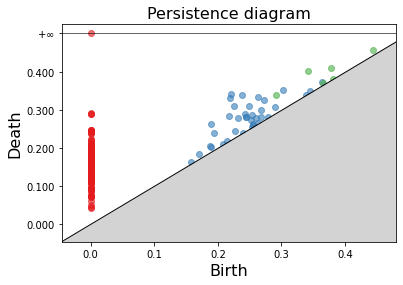

In [28]:
#Build Rips-Vietoris filtration and compute its persistence diagram
rips_complex = gd.RipsComplex(pt_cloud,max_edge_length=0.5) 
# the filtration value will stop at 0.5 ie: when all the points of dim < 0.5 are connected i stop and i do not add more simplices

simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
print("Number of simplices in the V-R complex: ", simplex_tree.num_simplices())

dgm = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print(simplex_tree.betti_numbers())
gd.plot_persistence_diagram(dgm)

In [ ]:
# each color corresponds to a dimension

# in red : dim 1 : all the vertices came at date 1
# in blue : dim 2 : circles start creating around 0.2 and at time 0.3... we can see that some have transformed into boundaries (dim 3)

# in a rips complex, simplex have filtration value equal to their ditance ? ? ?
# rips filtration is determined by pairwise distances

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

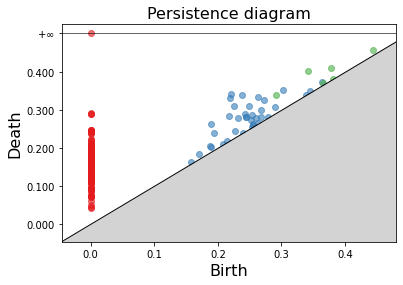

In [29]:
#Compute Rips-Vietoris filtration and compute its persistence diagram from
#a pairwise distance matrix
dist_mat = []
for i in range(nb_pts):
    ld = []
    for j in range(i):
        ld.append(np.linalg.norm(pt_cloud[i,:]-pt_cloud[j,:]))
    dist_mat.append(ld)
rips_complex2 = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=0.5)
simplex_tree2 = rips_complex2.create_simplex_tree(max_dimension=3)
diag2 = simplex_tree2.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag2)

Number of simplices in the alpha-complex:  2257
[1, 0, 0]


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

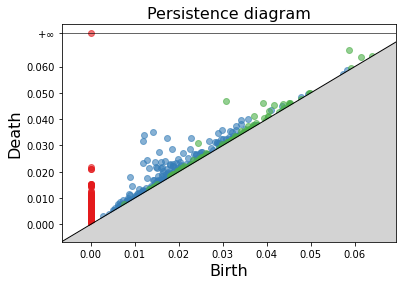

In [31]:
#Compute the alpha-complex filtration and compute its persistence
alpha_complex = gd.AlphaComplex(points=pt_cloud)
simplex_tree3 = alpha_complex.create_simplex_tree()
print("Number of simplices in the alpha-complex: ",simplex_tree3.num_simplices())
diag3 = simplex_tree3.persistence(homology_coeff_field=2, min_persistence=0)
print(simplex_tree3.betti_numbers())
gd.plot_persistence_diagram(diag3)

In [ ]:
# the alpha complex has much less simplices in it than the rips cmplec

## Exercise 4. 
+ Randomly sample n = 100 points on the unit circle in the Euclidean plane.
+ For R in np.arange(0.0,0.5,0.01), compute the Betti numbers of the subcomplex of the Rips-Vietoris filtration (up to dimension 2) made of the simplices with index value at most R and plot the curve giving the Betti numbers as functions of R. THese curves are called the Betti curves of the filtration. 
+ Can we get the same curves directly from the persistence diagram of the Rips-Vietoris filtration (you will have to guess what the persistence diagrams represent)? If so, compute them using the persistence diagram. 
+ Same questions using the α-complex filtrations (find a right range of values for α), and try to increase the number of points in the initial point cloud. 

In [ ]:
nb_pts = 100
angles = np.random.rand(nb_pts, 1)
pt_cloud = np.concatenate([np.cos(2*np.pi*angles),np.sin(2*np.pi*angles)], axis=1)

plt.scatter(pt_cloud[:,0],pt_cloud[:,1])
plt.axis("square")